Устанавливаем необходимые для работы зависимости

In [93]:
!pip install pykeen networkx matplotlib seaborn

Далее, импортируем необходимых модулей

In [94]:
import torch
import pykeen
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from sklearn.neighbors import NearestNeighbors
from pykeen.evaluation import RankBasedEvaluator
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

Здесь мы устанавливаем необходимые библиотеки и импортируем модули, которые будут использоваться в лабораторной работе.

## Взаимодействие с графовым датасетом и описание данных

В данной работе мы будем использовать графовый датасет [DBpedia50](https://arxiv.org/abs/1711.03438), предоставляющий собой выборку менее 50 тысяч сущностей из графа dbpedia.


In [95]:
from pykeen.datasets import CoDExMedium

In [96]:
# Загрузка графового датасета DBpedia50
dbpedia_dataset = CoDExMedium()

In [97]:
# Просмотр описания датасета
print(dbpedia_dataset)

CoDExMedium(training_path="/home/maxim/.data/pykeen/datasets/codexmedium/train.txt", testing_path="/home/maxim/.data/pykeen/datasets/codexmedium/test.txt", validation_path="/home/maxim/.data/pykeen/datasets/codexmedium/valid.txt")


# Обучение модели ComplEx на 100 эпохах


Использеум pipeline() предоставляемый пакетом pykeen для обучения модели, в качестве аргументов указываем тип модели, набор данных, количество эпох обучения и устройство на котором проводится обучений

Проверяем наличие GPU устройства и вызываем функцию pipeline(), которая запускает процесс обучения модели, тестирования и валидации.

In [98]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Запускаем пайплайн обучения модели, в этот раз использем модель [ComplEx](https://pykeen.readthedocs.io/en/stable/api/pykeen.models.ComplEx.html)

In [99]:
# Задаем параметры для pipeline
pipeline_results = pipeline(
    model="ComplEx",
    dataset=dbpedia_dataset,
    training_kwargs=dict(num_epochs=100),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=4.


Evaluating on cuda:0:   0%|          | 0.00/10.3k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 10.42s seconds



В PyKEEN, функция plot_losses используется для визуализации изменения значений функции потерь во времени (по эпохам) в процессе обучения модели. Эта функция часто используется для мониторинга производительности модели во время тренировки и может быть полезной для оценки, насколько хорошо модель учится на обучающем наборе данных.


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

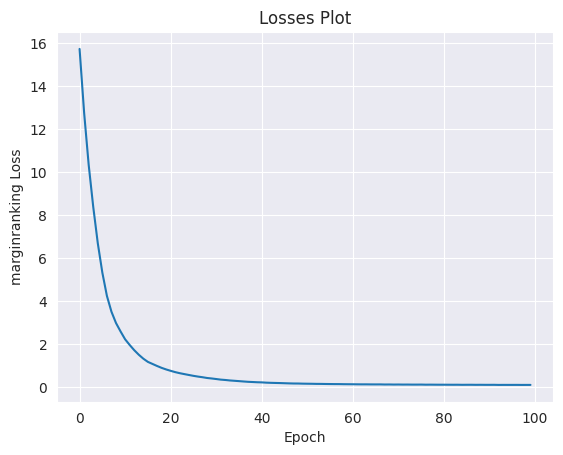

In [100]:
# Обученная модель хранится в pipeline_results
model = pipeline_results.model

#plot loss
pipeline_results.plot_losses()

## Метрики оценки работы модели

В PyKEEN пакет metrics предоставляет реализацию различных метрик, которые могут быть использованы для оценки качества работы моделей знаний (knowledge graph embedding models). Эти метрики позволяют оценивать, насколько хорошо модель справляется с предсказанием троек в графе знаний.

Некоторые из основных метрик, доступных в пакете metrics:

*   Rank-based Metrics - которые измеряют позицию верного ответа (положительной тройки) в отсортированном списке всех возможных троек
*   Top-K Metrics - которые оценивают качество предсказаний в топ-K результатах.
*   Clustering Metrics - которые измеряют качество кластеризации.

Рассчитаем некоторые из них далее.

In [101]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

# Оценить работу модели
metrics = evaluator.evaluate(pipeline_results.model, dbpedia_dataset.testing.mapped_triples,
                             additional_filter_triples=[dbpedia_dataset.training.mapped_triples,
                                                        dbpedia_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=4.


Evaluating on cuda:0:   0%|          | 0.00/10.3k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 28.19s seconds


Hits@1: 0.0031034817185530018
Hits@3: 0.009504412763068567
Hits@5: 0.014402094850160023
Hits@10: 0.02526428086509553
Mean Reciprocal Rank: 0.011825311928987503


## Получение представлений узлов

После того как модель обучена, мы можем полчить представления узлов и отношений из результатов работы пайплайна.

In [102]:
node_embeddings = pipeline_results.model.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

Мы извлекаем представления узлов из обученной модели. В этом контексте, представления узлов - это векторы, представляющие сущности в графе.


Далее извлечем лейблы для сущнойстей и визуализируем некоторые из сущностей на плоскости.

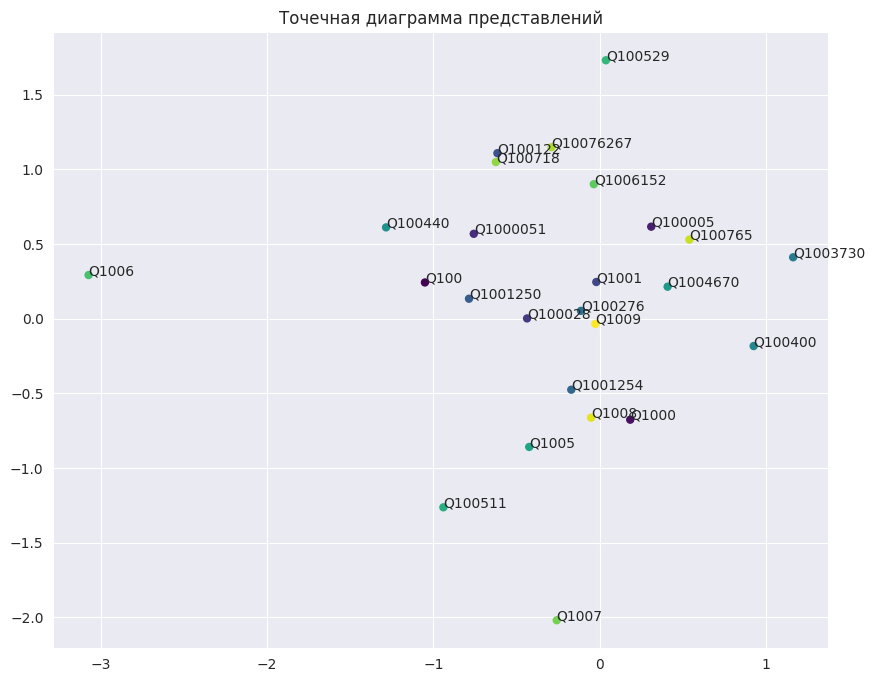

In [103]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())

def visualize_embeddings(embeddings, labels):
    # Scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.arange(len(labels)), cmap='viridis', s=25)

    # Добавляем лейблы к точкаи на графике
    for i, label in enumerate(labels):
        plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]), alpha=1)

    plt.title('Точечная диаграмма представлений')
    plt.show()

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

Мы используем NetworkX и Matplotlib для визуализации представлений узлов на графе. Каждая сущность представлена точкой в двумерном пространстве, и близкие точки соответствуют похожим узлам в графе.


## Измерение Node Similarity

Добавим код для измерения близости узлов на основе представлений. Расчитаем близость между несколькими случайными узлами. Используем для этого косинусную схожесть, манхэттенское и евклидово расстояние. Визуализируем полученные результаты как матрицу близости.


[[ 0.       26.73357  29.559807 28.183432]
 [26.73357   0.       26.064272 27.169495]
 [29.559807 26.064272  0.       26.955559]
 [28.183432 27.169495 26.955559  0.      ]]


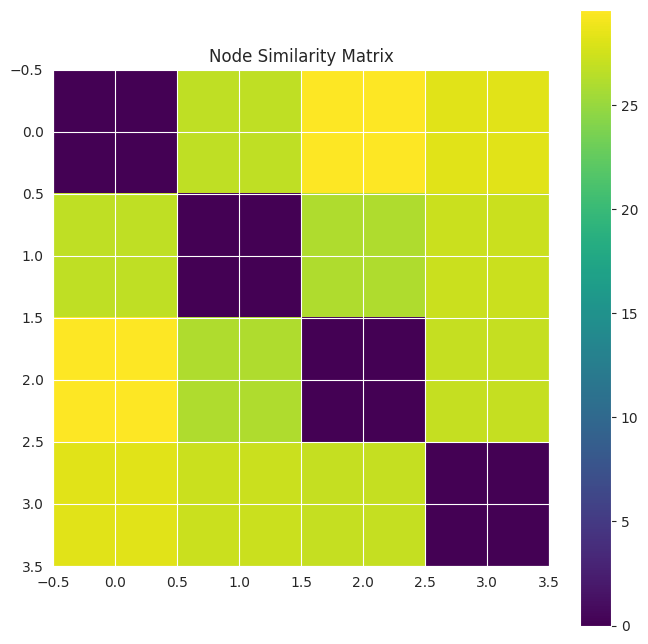

[[ 1.0000002  -0.0244894  -0.19546232 -0.04143407]
 [-0.0244894   1.0000002  -0.00124465 -0.03948618]
 [-0.19546232 -0.00124465  1.          0.02283196]
 [-0.04143407 -0.03948618  0.02283196  1.        ]]


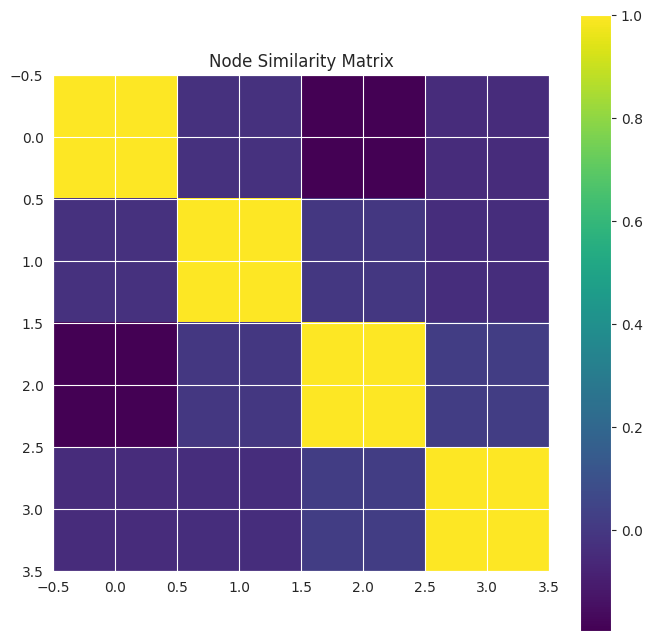

[[  0.         424.31790916 473.19724347 448.52134309]
 [424.31790916   0.         411.70706966 433.1118699 ]
 [473.19724347 411.70706966   0.         438.23075668]
 [448.52134309 433.1118699  438.23075668   0.        ]]


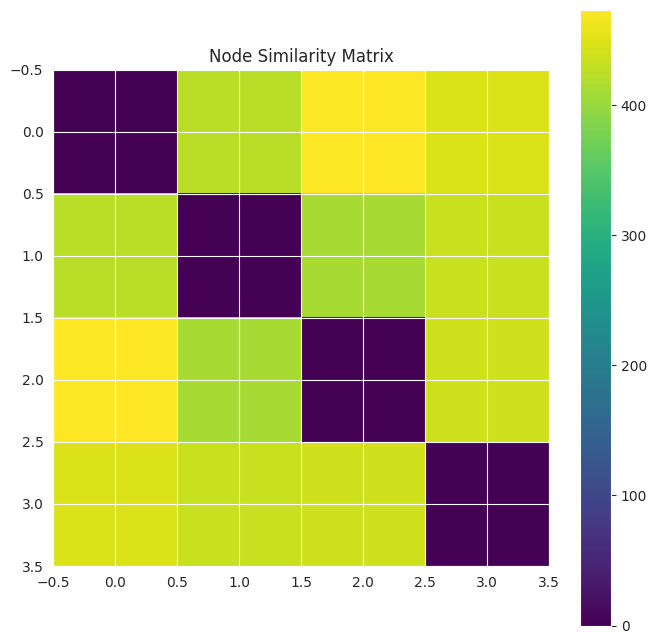

In [104]:
def diplay_matrix(similarity_matrix):
  # Визуализация матрицы близости
  plt.figure(figsize=(8, 8))
  plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
  plt.colorbar()
  plt.title('Node Similarity Matrix')
  plt.show()


# Рассчет близости между узлами
methods = [euclidean_distances,cosine_similarity,manhattan_distances]
#Узлы
nodes = [embedding_numpy[1324],embedding_numpy[12240],embedding_numpy[15386],embedding_numpy[12456]]
for method in methods:
  similarity_matrix = method(nodes)
  print(similarity_matrix)
  diplay_matrix(similarity_matrix)

Этот код использует euclidean_distances,cosine_similarity и manhattan_distances из scikit-learn для вычисления матрицы близости между узлами на основе их представлений. Затем мы визуализируем эту матрицу для наглядного представления Node Similarity.

## Поиск соседей узла
Одной из задач где используется схожесть узлов является задача поиска ближайших соседей конкретного узла в графе.
Рассмотрии применение NearestNeighbors на созданных представлениях с использованием только что рассмотренных методов рассчета близости.

In [105]:
# Выбираем случайный узел
random_node_index = 517
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       20.079067 20.38766  20.400259]]
Индексы:[[  517 13034  2590  5615]]
Ближайшие соседи узла Q108175: ['Q108175', 'Q5862903', 'Q156539', 'Q22955657'] 

Метрика:cosine
Дистанции:[[0.         0.785138   0.7953862  0.81194055]]
Индексы:[[  517  2140 16906   977]]
Ближайшие соседи узла Q108175: ['Q108175', 'Q1446181', 'Q97871', 'Q117688'] 

Метрика:manhattan
Дистанции:[[  0.         312.14370728 326.58300781 329.18478394]]
Индексы:[[  517 13034  5615  2306]]
Ближайшие соседи узла Q108175: ['Q108175', 'Q5862903', 'Q22955657', 'Q151825'] 


In [106]:
# Выбираем второй случайный узел
random_node_index = 2738
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       20.100378 20.718916 20.75352 ]]
Индексы:[[ 2738 13034  3209  2306]]
Ближайшие соседи узла Q159551: ['Q159551', 'Q5862903', 'Q1691611', 'Q151825'] 

Метрика:cosine
Дистанции:[[0.         0.8024982  0.80774677 0.8099388 ]]
Индексы:[[ 2738  1683  4941 13587]]
Ближайшие соседи узла Q159551: ['Q159551', 'Q1325743', 'Q213355', 'Q63960'] 

Метрика:manhattan
Дистанции:[[  0.         308.27288818 327.68127441 328.07608032]]
Индексы:[[ 2738 13034  8924  2590]]
Ближайшие соседи узла Q159551: ['Q159551', 'Q5862903', 'Q328695', 'Q156539'] 


## Эксперименты

Для экспериментов была выбрана модель HolE, 

Сравните эффективность модели выше и HolE в предсказании отношений и измерении Node Similarity.

# Модель ComplEx на 20 эпохах обучений

In [107]:
pipeline_results = pipeline(
    model="ComplEx",
    dataset=dbpedia_dataset,
    training_kwargs=dict(num_epochs=20),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=16.


Evaluating on cuda:0:   0%|          | 0.00/10.3k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 7.54s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

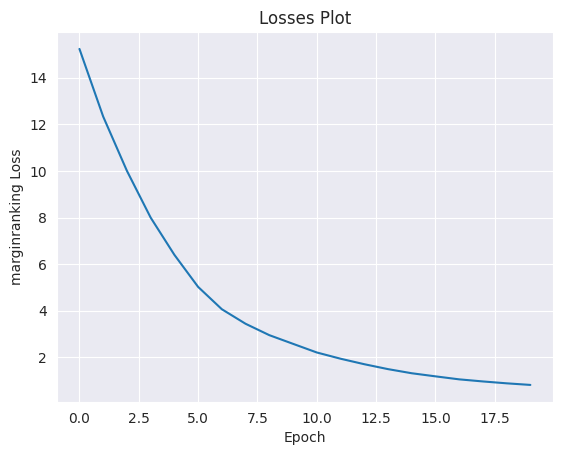

In [108]:
pipeline_results.plot_losses()

In [109]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()
model_v2 = pipeline_results.model

# Оценить работу модели
metrics = evaluator.evaluate(model_v2, dbpedia_dataset.testing.mapped_triples,
                             additional_filter_triples=[dbpedia_dataset.training.mapped_triples,
                                                        dbpedia_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=16.


Evaluating on cuda:0:   0%|          | 0.00/10.3k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 8.48s seconds


Hits@1: 0.00014547570555717196
Hits@3: 0.0006303947240810785
Hits@5: 0.000969838037047813
Hits@10: 0.0018426922703908446
Mean Reciprocal Rank: 0.0012262363452464342


In [110]:
node_embeddings = model_v2.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

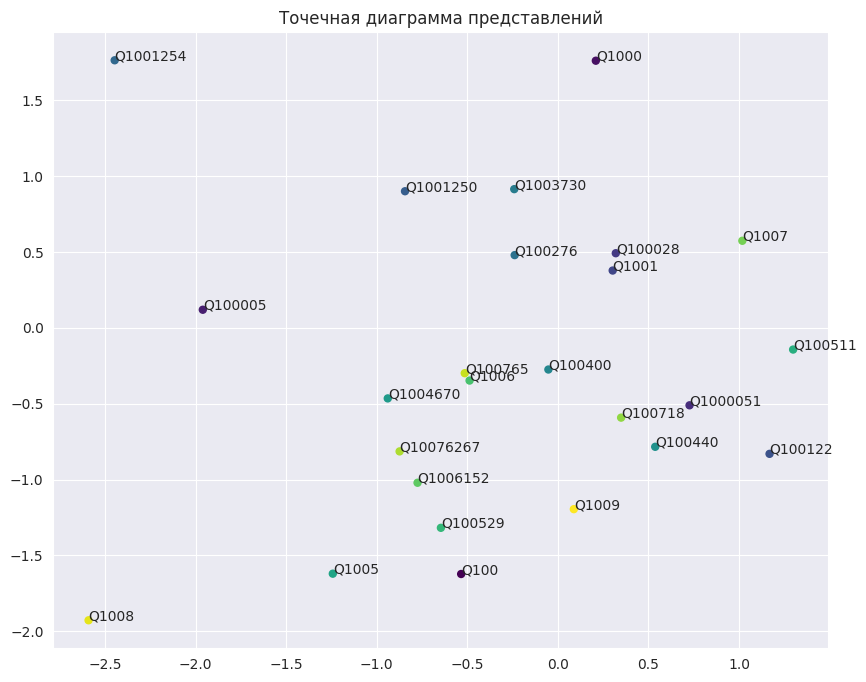

In [111]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

In [112]:
# Выбираем случайный узел
random_node_index = 678
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       24.87713  25.045351 25.13326 ]]
Индексы:[[  678 14221  5181 11720]]
Ближайшие соседи узла Q111436: ['Q111436', 'Q707607', 'Q216582', 'Q47221'] 

Метрика:cosine
Дистанции:[[0.        0.8257593 0.8258805 0.8262654]]
Индексы:[[  678  5282 11720  5181]]
Ближайшие соседи узла Q111436: ['Q111436', 'Q219622', 'Q47221', 'Q216582'] 

Метрика:manhattan
Дистанции:[[  0.         394.52432251 395.91934204 398.440979  ]]
Индексы:[[  678 14221  5181 13434]]
Ближайшие соседи узла Q111436: ['Q111436', 'Q707607', 'Q216582', 'Q622683'] 


In [113]:
# Выбираем второй случайный узел
random_node_index = 43
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       23.598957 24.089354 24.190401]]
Индексы:[[   43  7985  3881 15501]]
Ближайшие соседи узла Q101437: ['Q101437', 'Q30', 'Q1860', 'Q822146'] 

Метрика:cosine
Дистанции:[[0.        0.8120749 0.8137176 0.8152195]]
Индексы:[[   43 10478 11998  6796]]
Ближайшие соседи узла Q101437: ['Q101437', 'Q40852', 'Q49683', 'Q257165'] 
Метрика:manhattan
Дистанции:[[  0.         380.41296387 382.72796631 386.62045288]]
Индексы:[[  43 3881 7985 9854]]
Ближайшие соседи узла Q101437: ['Q101437', 'Q1860', 'Q30', 'Q366956'] 


# Модель HolE, число эпох 100

In [114]:
pipeline_results = pipeline(
    model="HolE",
    dataset=dbpedia_dataset,
    training_kwargs=dict(num_epochs=100),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/725 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2.


Evaluating on cuda:0:   0%|          | 0.00/10.3k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 39.29s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

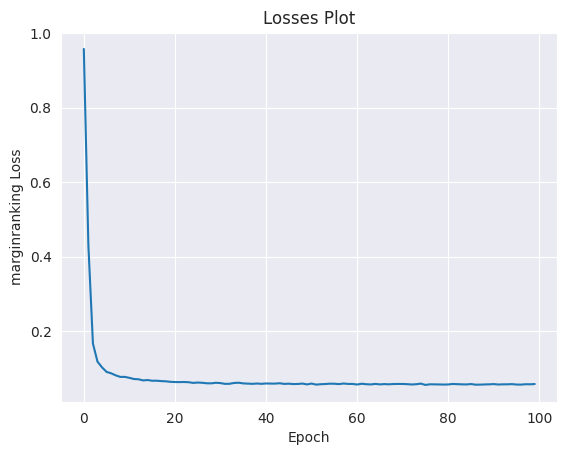

In [115]:
pipeline_results.plot_losses()

In [116]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

model_v3 = pipeline_results.model

# Оценить работу модели
metrics = evaluator.evaluate(model_v3, dbpedia_dataset.testing.mapped_triples,
                             additional_filter_triples=[dbpedia_dataset.training.mapped_triples,
                                                        dbpedia_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=4.


Evaluating on cuda:0:   0%|          | 0.00/10.3k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 28.78s seconds


Hits@1: 0.06386383473959849
Hits@3: 0.11735040248278537
Hits@5: 0.1508098147609349
Hits@10: 0.2007079817670449
Mean Reciprocal Rank: 0.11000106483697891


In [117]:
node_embeddings = model_v3.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

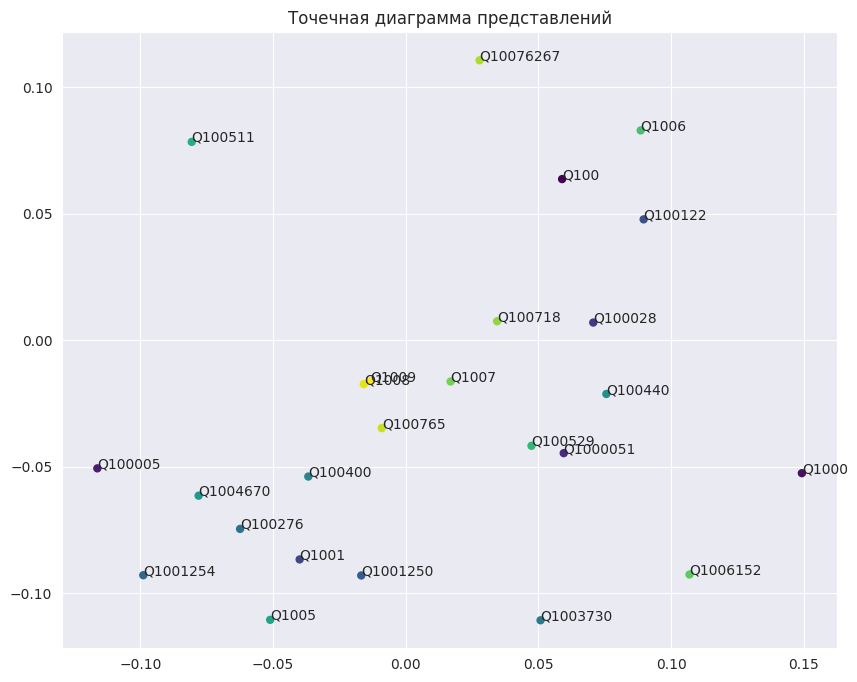

In [118]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

In [119]:
# Выбираем случайный узел
random_node_index = 345
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[0.        1.0601114 1.0634245 1.0699457]]
Индексы:[[  345 15762 14848 13056]]
Ближайшие соседи узла Q106134: ['Q106134', 'Q85715', 'Q75727', 'Q58845'] 

Метрика:cosine
Дистанции:[[0.         0.5660563  0.5864762  0.59378046]]
Индексы:[[  345 15762 16041 13605]]
Ближайшие соседи узла Q106134: ['Q106134', 'Q85715', 'Q89689', 'Q64176'] 

Метрика:manhattan
Дистанции:[[ 0.         12.02219582 12.10659409 12.15245342]]
Индексы:[[  345 13056 15762   375]]
Ближайшие соседи узла Q106134: ['Q106134', 'Q58845', 'Q85715', 'Q106429'] 


In [120]:
# Выбираем второй случайный узел
random_node_index = 631
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[0.        1.048177  1.0572133 1.063795 ]]
Индексы:[[ 631 9401  569 3260]]
Ближайшие соседи узла Q110397: ['Q110397', 'Q348534', 'Q108946', 'Q170564'] 

Метрика:cosine
Дистанции:[[0.         0.58962166 0.5998814  0.60740936]]
Индексы:[[ 631 9401  569 3260]]
Ближайшие соседи узла Q110397: ['Q110397', 'Q348534', 'Q108946', 'Q170564'] 

Метрика:manhattan
Дистанции:[[ 0.         11.58180904 11.87732506 12.0430994 ]]
Индексы:[[ 631 4364  148 4616]]
Ближайшие соседи узла Q110397: ['Q110397', 'Q195402', 'Q103569', 'Q204374'] 
